# Bank Churn Prediction


Desenvolver um modelo de Machine Learning para prever a evasão de clientes bancários e identificar os principais fatores de risco financeiro e comportamental.

O churn bancário é fortemente influenciado por:
* **Perfil Financeiro:** Saldo, Salário, Score de Crédito.
* **Engajamento:** Quantidade de produtos e atividade da conta.
* **Satisfação:** Histórico de reclamações.

### 1. Setup
Configuração inicial do ambiente e instalação das bibliotecas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### 2. Carregamento de dados
O dataset contém registros históricos de clientes, incluindo status de saída (`Exited`), dados demográficos e bancários.

In [ ]:
df = pd.read_csv('../data/Customer-Churn-Records.csv')

display(df.head())
df.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


(10000, 18)

### 3. Limpeza de Dados
Remoção de variáveis que não contribuem para a predição comportamental e podem introduzir ruído ou viés ético no modelo:
* **RowNumber:** Índice numérico sem valor preditivo.
* **CustomerId:** Identificador aleatório.
* **Surname:** Removido para eliminar viés de origem/etnia e focar estritamente no perfil financeiro.

In [3]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

#### 4.1 Distribuição do Perfil Financeiro
Analisamos a distribuição de idade, score de crédito e saldo para entender o perfil médio do cliente.

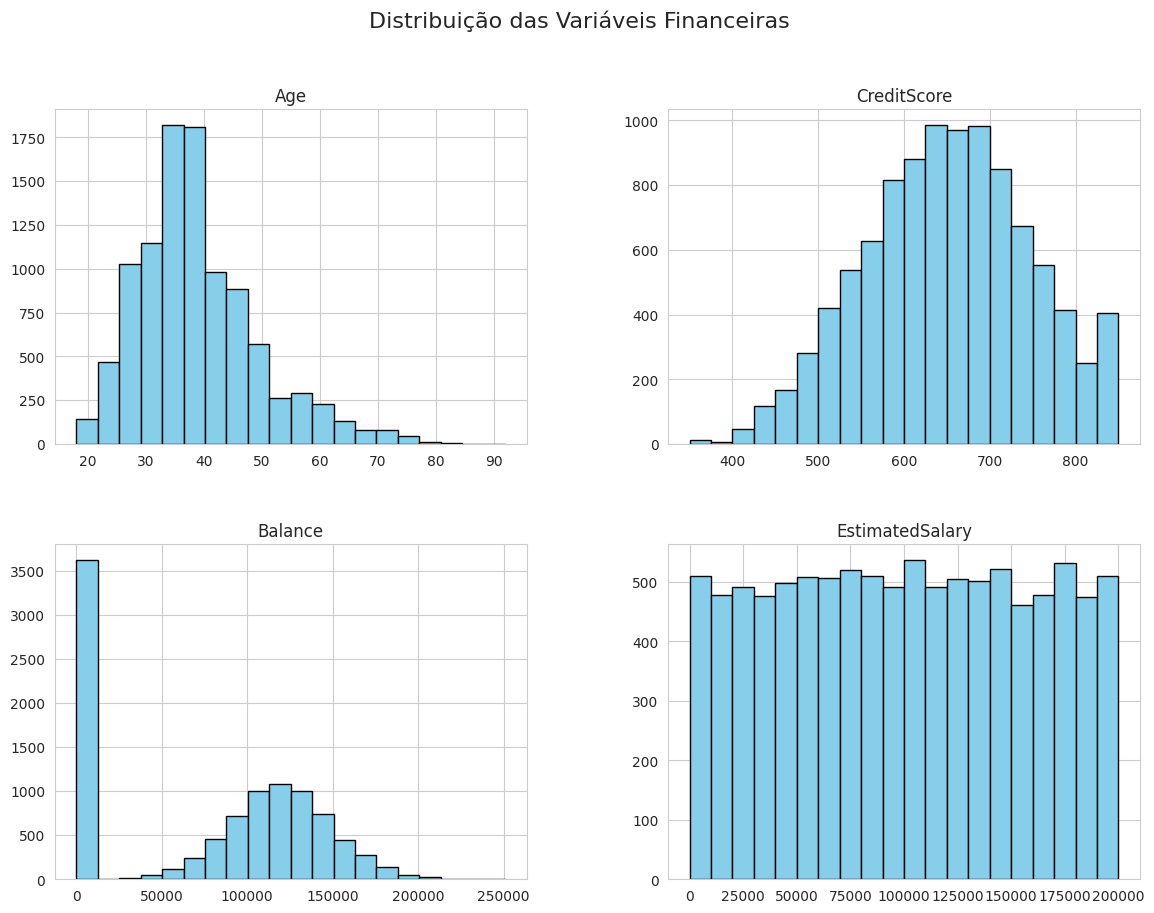

In [4]:
colunas_numericas = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

df_clean[colunas_numericas].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Financeiras', fontsize=16)
plt.show()

#### 4.2 O impacto da Idade no Churn
Investigação da hipótese: **"Clientes mais velhos tendem a cancelar a conta com mais frequência?"**
O gráfico abaixo compara a mediana de idade entre os grupos que ficaram (0) e saíram (1).

/tmp/ipykernel_4880/3463695352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df_clean, palette='Set2')


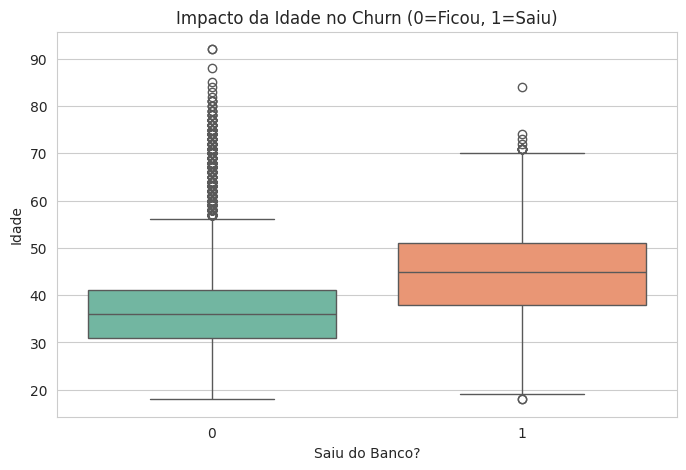

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Age', data=df_clean, palette='Set2')
plt.title('Impacto da Idade no Churn (0=Ficou, 1=Saiu)')
plt.xlabel('Saiu do Banco?')
plt.ylabel('Idade')
plt.show()

#### 4.3 Matriz de COrrelação e Fatores de Risco
Análise de quais variáveis têm maior correlação matemática com o cancelamento (`Exited`).
* **Cores Quentes (Vermelho):** Forte correlação positiva (Quando um sobe, o churn sobe).
* **Cores Frias (Azul):** Correlação negativa (Fatores de retenção).

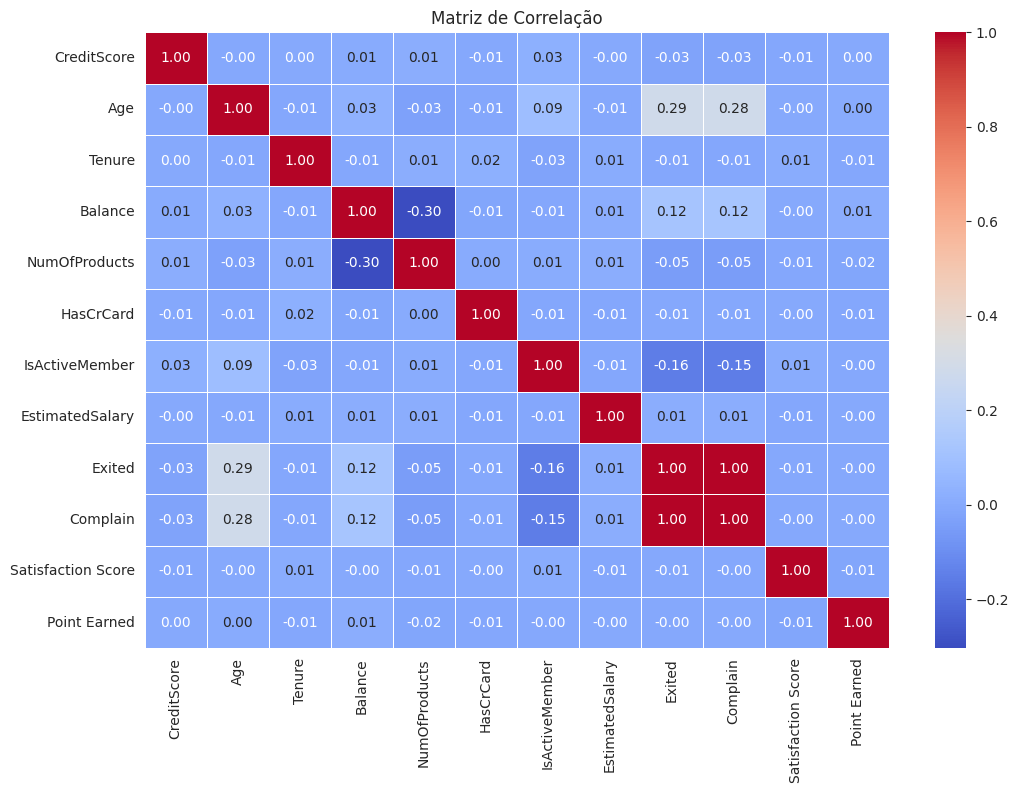

In [6]:
plt.figure(figsize=(12, 8))

correlacao = df_clean.select_dtypes(include='number').corr()

sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()